# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "REA13NVN" # @param {type:"string"}
name = "Andre Fransiscus Masalle" # @param {type:"string"}
drive_link = ""  # @param {type:"string"}

assignment_id = "00_ml_project"

# Import grader package
# !pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 80% and an F1 score of more than 85%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 75% and an F1 score of more than 80%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 70% and an F1 score between 70% and 80%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 65% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 65% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

In [ ]:
# Write your preprocessing and data cleaning here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn

from sklearn.calibration import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [ ]:
# Load your data
df = pd.read_csv("C:/Users/Lenovo/OneDrive/Documents/Bootcamp AI/Project 2/FIFA23dataset/FIFA21_official_data.csv")
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,13.0,48.0,51.0,56.0,40.0,56.0,GK,49.0,€120K,NaN
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,10.0,52.0,55.0,52.0,42.0,57.0,GK,51.0,€83K,5.0
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,11.0,50.0,49.0,50.0,53.0,55.0,GK,51.0,€149K,8.0
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,10.0,50.0,51.0,49.0,50.0,51.0,GK,49.0,€94K,8.0


In [ ]:
# 1. Jadi Strategi saya adalah, pertama-tama melakukan pre-processing terhadap semua data (ini dilakukan semata untuk latihan)
# 2. Drop data yang sudah jelas tidak memiliki hubungan ataupun
# 3. kemudian menentukan korelasi antar data yang lainnya terhadap data 'Overall' (Latihan)
# 4. Setelah melihat korelasinya, akan di dikeluarkan data-data yang berkorelasi lemah (Latihan)
# 5. Split data menjadi train dan test
# 6. Train model
# 7. Evaluasi model

# ! Note: Untuk yang berlabel latihan tidak akan diikutsertakan di notebook ini

In [ ]:


# 1. Preprocessing terhadap semua data

# Ubah Value dan Wage menjadi numerik
conv_harga= ['Value','Wage']

for i in conv_harga:
    # Hapus simbol '€' dan ganti 'K' dengan '*1000', 'M' dengan '*1000000'
    df[i] = df[i].replace('[\€]', '', regex=True)
    df[i] = df[i].replace({'K': '*1000', 'M': '*1000000'}, regex=True)

    # Konversi string ke tipe numerik menggunakan eval
    df[i] = df[i].map(lambda x: eval(x) if isinstance(x, str) else x)

# print(df[conv_harga])

# Ubah Tinggi menjadi cm dan Berat menjadi kg
def beratKg(x):
    berat_kg = int(x.replace('lbs', '')) * 0.453592
    return round(berat_kg, 2)

df['Weight'] = df['Weight'].apply(beratKg)

print(df['Weight'])


# Ubah Berat menjadi cm
def tinggi_cm(x):
    # Memisahkan kaki dan inci menggunakan karakter kutip sebagai pemisah
    kaki, inci = x.split("'")
    # Menghitung tinggi dalam sentimeter
    tinggi_cm = int(kaki) * 30.48 + int(inci.replace("'", "")) * 2.54

    return round(tinggi_cm, 2)
df['Height'] = df['Height'].apply(tinggi_cm)
print(df['Height'])


#Ubah Work Rate menjadi label
le = LabelEncoder()
le.fit(df['Work Rate'].unique())
# Work Rate
df["Work Rate"] = le.transform(df["Work Rate"])
print(df['Work Rate'].head())

df['Preferred Foot'] = df['Preferred Foot'].replace(["Right","Left"],["1","2"])
print(df['Preferred Foot'].head())



0        86.18
1        69.85
2        68.95
3        73.03
4        68.95
         ...  
17103    79.83
17104    84.82
17105    79.83
17106    76.20
17107    78.02
Name: Weight, Length: 17108, dtype: float64
0        182.88
1        180.34
2        177.80
3        175.26
4        172.72
          ...  
17103    193.04
17104    195.58
17105    190.50
17106    185.42
17107    182.88
Name: Height, Length: 17108, dtype: float64
0    2
1    0
2    0
3    8
4    0
Name: Work Rate, dtype: int32
0    1
1    1
2    1
3    2
4    2
Name: Preferred Foot, dtype: object


In [ ]:
# Mengecek kolom yang memiliki nilai null atau NaN
missing_values = df.isnull().sum()

# Menampilkan nama kolom dan jumlah missing values di setiap kolom
for col, count in missing_values.items():
    if count > 0:
        print(col," ",count)



Club   325
Body Type   25
Real Face   25
Position   20
Jersey Number   20
Joined   1449
Loaned From   16186
Contract Valid Until   496
Volleys   39
Curve   39
Agility   39
Balance   39
Jumping   39
Interceptions   3
Positioning   3
Vision   39
Composure   287
Marking   16166
SlidingTackle   39
Release Clause   1629
DefensiveAwareness   942


In [ ]:
unused_columns = ["Name","ID","Photo","Nationality","Flag","Club","Club Logo","Body Type","Real Face","Jersey Number",
                  "Loaned From","Joined","Contract Valid Until","Marking","Best Position","Release Clause","Position"]

processed_df = df.drop(columns=unused_columns)
print(processed_df.info())

processed_df = processed_df.dropna()
print(processed_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17108 non-null  int64  
 1   Overall                   17108 non-null  int64  
 2   Potential                 17108 non-null  int64  
 3   Value                     17108 non-null  float64
 4   Wage                      17108 non-null  int64  
 5   Special                   17108 non-null  int64  
 6   Preferred Foot            17108 non-null  object 
 7   International Reputation  17108 non-null  float64
 8   Weak Foot                 17108 non-null  float64
 9   Skill Moves               17108 non-null  float64
 10  Work Rate                 17108 non-null  int32  
 11  Height                    17108 non-null  float64
 12  Weight                    17108 non-null  float64
 13  Crossing                  17108 non-null  float64
 14  Finish

In [ ]:
# Write your code here

# Define the target output (Good >= 75)
df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0) #Define the OK Player using treshold of 75
print(df['OK Player'].head())


0    1
1    1
2    1
3    1
4    1
Name: OK Player, dtype: int64


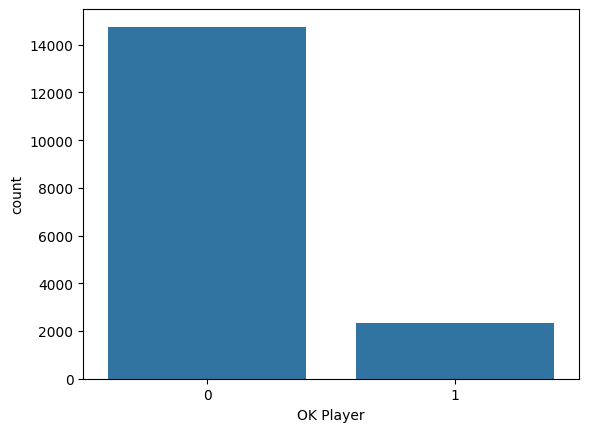

In [ ]:
# Cek imbalance data
sns.countplot(x='OK Player', data=df)
plt.show()

In [ ]:
unused_columns = ["Name","ID","Photo","Nationality","Flag","Club","Club Logo","Body Type","Real Face","Jersey Number",
                  "Loaned From","Joined","Contract Valid Until","Marking","Best Position","Release Clause","Position"]

processed_df = df.drop(columns=unused_columns)
print(processed_df.info())

processed_df = processed_df.dropna()
print(processed_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17108 non-null  int64  
 1   Overall                   17108 non-null  int64  
 2   Potential                 17108 non-null  int64  
 3   Value                     17108 non-null  float64
 4   Wage                      17108 non-null  int64  
 5   Special                   17108 non-null  int64  
 6   Preferred Foot            17108 non-null  object 
 7   International Reputation  17108 non-null  float64
 8   Weak Foot                 17108 non-null  float64
 9   Skill Moves               17108 non-null  float64
 10  Work Rate                 17108 non-null  int32  
 11  Height                    17108 non-null  float64
 12  Weight                    17108 non-null  float64
 13  Crossing                  17108 non-null  float64
 14  Finish

## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below. Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features.

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

In [ ]:
# # Identify the features you will use in your model
ml_features = [['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                'Skill Moves', 'Work Rate', 'Position', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 'DefensiveAwareness']]

In [ ]:
# # Split data into training set and test set
#Treat imbalance menggunakan SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = processed_df.drop('OK Player',axis=1)
y = processed_df['OK Player'].astype('category')

# #splitting data train 70% test 30%
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Pisahkan data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Gunakan SMOTE untuk oversampling pada data training saja
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [ ]:
#Menjalankan data training dengan SVM, kernel sigmoid

model_rfc = RandomForestClassifier(n_estimators=5)
model_rfc.fit(x_train, y_train)

#Menjalankan data testing
y_predict_rfc = model_rfc.predict(x_test)
print(y_predict_rfc)

[0 0 0 ... 0 0 1]


In [ ]:
print(f1_score(y_test, y_predict_rfc))
print(accuracy_score(y_test, y_predict_rfc))

# # Evaluate the model
ml_accuracy = accuracy_score(y_test, y_predict_rfc)
ml_f1_score = f1_score(y_test, y_predict_rfc)



0.9938744257274119
0.9983505154639175


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [ ]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN